In this notebook we identify IEM related publications with a topic model.

In [1]:
%run "Common Setup.ipynb"

In [2]:
filtered_rc = wosis.load_query_results('{}/initial_filtered_corpora.txt'.format(TMP_DIR))
num_records = []

In [3]:
# Cache results to a specific file for later reuse
iem_topics = wosis.find_topics(filtered_rc, cache_as='{}/iem_topic.pkl'.format(TMP_DIR))

Topic 1: model framework integr environment develop approach process support design assess
Topic 2: climat chang climate change impact scenario futur global project adapt
Topic 3: flow runoff river hydrolog basin catchment model wa simul hydrological
Topic 4: water irrig groundwat resourc manag demand qualiti river resources basin
Topic 5: land use cover chang agricultur scenario spatial urban change crop
Topic 6: emiss air energi carbon cost pollut emissions polici reduct gas
Topic 7: flood risk event forecast urban rainfal peak extrem hazard river
Topic 8: soil moistur moisture spatial content wa properti surfac field scale
Topic 9: ecosystem forest carbon speci ecolog habitat fish area lake veget
Topic 10: data model uncertainti use method paramet spatial estim hydrolog predict


Based on the above results Topic 1 is selected to represent modeling frameworks

In [4]:
framework_pubs = iem_topics.get_topic_by_id(1)
iem_frameworks_rc = wosis.extract_recs(framework_pubs.id, filtered_rc)

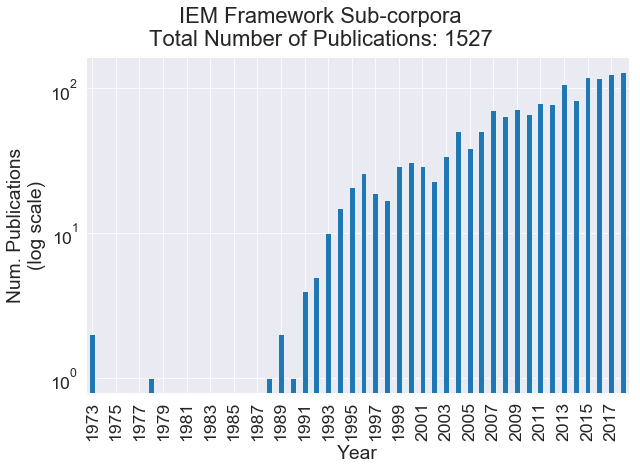

In [5]:
wos_plot.plot_pub_trend(iem_frameworks_rc, title='IEM Framework Sub-corpora', 
                        save_plot_fn='{}/iem_framework_subcorpora'.format(FIG_DIR))

In [6]:
iem_frameworks_df = wosis.rc_to_df(iem_frameworks_rc)
linked = wosis.link_to_pub(iem_frameworks_df)
linked.loc[linked.year == min(linked.year), ~linked.columns.isin(hide_columns)]

,AU,SO,copyright,title,year,DOI link
495,"MCKENNA, N",SIMULATION,,ENVIRONMENTAL MODELING,1973,https://dx.doi.org/10.1177/003754977302000201
1236,"HOUSE, PW",SIMULATION,,ENVIRONMENTAL MODELING VS CHICKEN-SOUP APPROAC...,1973,https://dx.doi.org/10.1177/003754977302000601


In [7]:
after_drought = linked.loc[linked.year == 1988, ~linked.columns.isin(hide_columns)]
after_drought

,AU,SO,copyright,title,year,DOI link
534,"MARNICIO, RJ|RUBIN, ES",MATHEMATICAL AND COMPUTER MODELLING,,TECHNICAL MODELING FOR POLICY MAKING - INTEGRA...,1988,https://dx.doi.org/10.1016/0895-7177(88)90655-3


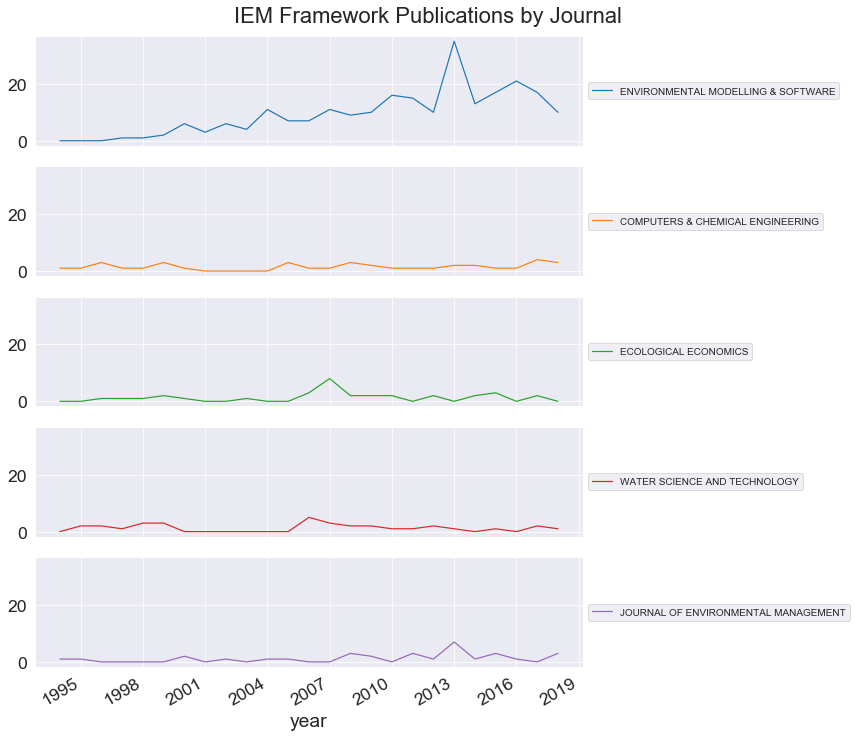

In [8]:
wos_plot.plot_journal_pub_trend(iem_frameworks_rc, title='IEM Framework Publications by Journal', top_n=5)

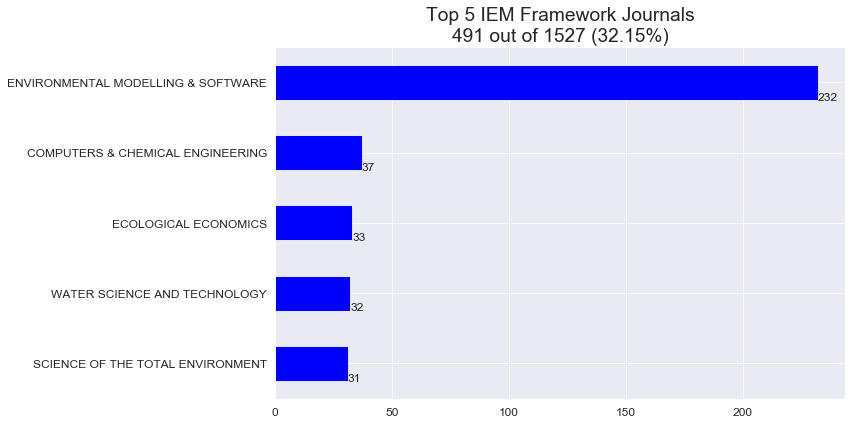

In [9]:
wos_plot.plot_pubs_per_journal(iem_frameworks_rc, title='Top 5 IEM Framework Journals', 
                               top_n=5, annotate=True,
                               save_plot_fn='{}/iem_framework_subcorpora_top5_journals'.format(FIG_DIR)
                              )

In [10]:
cited_iem_frameworks = wosis.get_num_citations(iem_frameworks_rc, WOS_CONFIG, 
                                               cache_as='{}/iem_framework_citations.csv'.format(TMP_DIR))

cited_iem_frameworks.head(10)['title'].tolist()

['SCALE ISSUES IN HYDROLOGICAL MODELING - A REVIEW',
 'Examining the global environmental impact of regional consumption activities - Part 2: Review of input-output models for the assessment of environmental impacts embodied in trade',
 'Ten iterative steps in development and evaluation of environmental models',
 'Categorising tools for sustainability assessment',
 'Assessing the vulnerability of social-environmental systems',
 'Biotic ligand model, a flexible tool for developing site-specific water quality guidelines for metals',
 'Biotic ligand model of the acute toxicity of metals. 2. Application to acute copper toxicity in freshwater fish and Daphnia',
 'The tokamak Monte Carlo fast ion module NUBEAM in the National Transport Code Collaboration library',
 'A neuro-fuzzy computing technique for modeling hydrological time series',
 'Environmental copper: Its dynamics and human exposure issues']

In [12]:
cited_iem_frameworks = wosis.calc_average_citations(cited_iem_frameworks, sort=True)
cited_iem_frameworks.head(20).loc[:, ~cited_iem_frameworks.columns.isin(hide_columns)]

,AU,SO,copyright,title,year,citations,Avg. Citations
58,"Samir, K. C.|Lutz, Wolfgang",GLOBAL ENVIRONMENTAL CHANGE-HUMAN AND POLICY D...,Elsevier Ltd. This is an open access article ...,The human core of the shared socioeconomic pat...,2017,105,52.50
1,"Wiedmann, Thomas|Lenzen, Manfred|Turner, Karen...",ECOLOGICAL ECONOMICS,(c) 2006 Elsevier B.V. All rights reserved.,Examining the global environmental impact of r...,2007,623,51.92
39,"Pianosi, Francesca|Beven, Keith|Freer, Jim|Hal...",ENVIRONMENTAL MODELLING & SOFTWARE,Elsevier Ltd. This is an open access article ...,Sensitivity analysis of environmental models: ...,2016,138,46.00
15,"Kelly (Letcher), Rebecca A.|Jakeman, Anthony J...",ENVIRONMENTAL MODELLING & SOFTWARE,Elsevier Ltd. All rights reserved.,Selecting among five common modelling approach...,2013,266,44.33
3,"Ness, Barry|Urbel-Piirsalu, Evelin|Anderberg, ...",ECOLOGICAL ECONOMICS,(c) 2006 Elsevier B.V. All rights reserved.,Categorising tools for sustainability assessment,2007,476,39.67
2,"Jakeman, AJ|Letcher, RA|Norton, JP",ENVIRONMENTAL MODELLING & SOFTWARE,Elsevier Ltd. All rights reserved.,Ten iterative steps in development and evaluat...,2006,512,39.38
16,"Neteler, Markus|Bowman, M. Hamish|Landa, Marti...",ENVIRONMENTAL MODELLING & SOFTWARE,Elsevier Ltd. All rights reserved.,GRASS GIS: A multi-purpose open source GIS,2012,266,38.00
23,"Laniak, Gerard F.|Olchin, Gabriel|Goodall, Jon...",ENVIRONMENTAL MODELLING & SOFTWARE,Published by Elsevier Ltd.,Integrated environmental modeling: A vision an...,2013,221,36.83
20,"Toth, Gabor|van der Holst, Bart|Sokolov, Igor ...",JOURNAL OF COMPUTATIONAL PHYSICS,(C) 2011 Elsevier Inc. All rights reserved.,Adaptive numerical algorithms in space weather...,2012,253,36.14
13,"Bazilian, Morgan|Rogner, Holger|Howells, Mark|...",ENERGY POLICY,Elsevier Ltd. All rights reserved.,"Considering the energy, water and food nexus: ...",2011,272,34.00


Get citations for each paper in the decade and select the most cited for review

In [13]:
early_stage = iem_frameworks_rc.yearSplit(1987, 1999)
mid_stage = iem_frameworks_rc.yearSplit(2000, 2009)
late_stage = iem_frameworks_rc.yearSplit(2010, 2019)

cited_early_stage = wosis.get_num_citations(early_stage, WOS_CONFIG, 
                                            cache_as='{}/earlystage_iem_citations.csv'.format(TMP_DIR))

cited_mid_stage = wosis.get_num_citations(mid_stage, WOS_CONFIG, 
                                          cache_as='{}/midstage_iem_citations.csv'.format(TMP_DIR))

cited_late_stage = wosis.get_num_citations(late_stage, WOS_CONFIG, 
                                          cache_as='{}/latestage_iem_citations.csv'.format(TMP_DIR))

Authenticated (SID: 8EmWIq5lGzwNFePSwHA)


In [17]:
cited_early_stage = wosis.calc_average_citations(cited_early_stage, sort=True)
cited_early_stage.head(10).loc[:, ~cited_early_stage.columns.isin(hide_columns)]

,AU,SO,copyright,title,year,citations,Avg. Citations
0,"BLOSCHL, G|SIVAPALAN, M",HYDROLOGICAL PROCESSES,,SCALE ISSUES IN HYDROLOGICAL MODELING - A REVIEW,1995,748,149.6
2,"Yeomans, H|Grossmann, IE",COMPUTERS & CHEMICAL ENGINEERING,(C) 1999 Elsevier Science Ltd. All rights res...,A systematic modeling framework of superstruct...,1999,144,144.0
3,"Mandelbaum, A|Massey, WA|Reiman, MI",QUEUEING SYSTEMS,,Strong approximations for Markovian service ne...,1998,129,64.5
1,"MANNE, A|MENDELSOHN, R|RICHELS, R",ENERGY POLICY,,A MODEL FOR EVALUATING REGIONAL AND GLOBAL EFF...,1995,288,57.6
19,"Ashley, RM|Hvitved-Jacobsen, T|Bertrand-Krajew...",WATER SCIENCE AND TECHNOLOGY,(C) 1999 IAWQ Published by Elsevier Science L...,Quo vadis sewer process modelling?,1999,47,47.0
22,"Reed, M|Cuddy, SM|Rizzoli, AE",ENVIRONMENTAL MODELLING & SOFTWARE,(C) 1999 Elsevier Science Ltd. Ail rights res...,A framework for modelling multiple resource ma...,1999,45,45.0
23,"Kanudia, A|Loulou, R",INTERNATIONAL JOURNAL OF ENVIRONMENT AND POLLU...,,Advanced bottom-up modelling for national and ...,1999,44,44.0
24,"Al-Ahmari, AMA|Ridgway, K",COMPUTERS IN INDUSTRY,(C) 1999 Elsevier Science B.V. All rights res...,An integrated modelling method to support manu...,1999,43,43.0
25,"Vecchietti, A|Grossmann, IE",COMPUTERS & CHEMICAL ENGINEERING,(C) 1999 Elsevier Science Ltd. All rights res...,LOGMIP: a disjunctive 0-1 non-linear optimizer...,1999,42,42.0
29,"Wickham, JD|Jones, KB|Riitters, KH|O'Neill, RV...",ENVIRONMENTAL MANAGEMENT,,An integrated environmental assessment of the ...,1999,32,32.0


In [18]:
cited_mid_stage = wosis.calc_average_citations(cited_mid_stage, sort=True)
cited_mid_stage.head(10).loc[:, ~cited_mid_stage.columns.isin(hide_columns)]

,AU,SO,copyright,title,year,citations,Avg. Citations
0,"Wiedmann, Thomas|Lenzen, Manfred|Turner, Karen...",ECOLOGICAL ECONOMICS,(c) 2006 Elsevier B.V. All rights reserved.,Examining the global environmental impact of r...,2007,623,207.67
2,"Ness, Barry|Urbel-Piirsalu, Evelin|Anderberg, ...",ECOLOGICAL ECONOMICS,(c) 2006 Elsevier B.V. All rights reserved.,Categorising tools for sustainability assessment,2007,476,158.67
10,"Antiga, Luca|Piccinelli, Marina|Botti, Lorenzo...",MEDICAL & BIOLOGICAL ENGINEERING & COMPUTING,NaN,An image-based modeling framework for patient-...,2008,274,137.00
1,"Jakeman, AJ|Letcher, RA|Norton, JP",ENVIRONMENTAL MODELLING & SOFTWARE,Elsevier Ltd. All rights reserved.,Ten iterative steps in development and evaluat...,2006,512,128.00
29,"Ziehn, T.|Tomlin, A. S.",ENVIRONMENTAL MODELLING & SOFTWARE,Elsevier Ltd. All rights reserved.,GUI-HDMR - A software tool for global sensitiv...,2009,121,121.00
9,"Liu, Jianguo|Dietz, Thomas|Carpenter, Stephen ...",AMBIO,NaN,Coupled human and natural systems,2007,304,101.33
3,"Eakin, Hallie|Luers, Amy Lynd",ANNUAL REVIEW OF ENVIRONMENT AND RESOURCES,NaN,Assessing the vulnerability of social-environm...,2006,401,100.25
43,"Thabrew, Lanka|Wiek, Arnim|Ries, Robert",JOURNAL OF CLEANER PRODUCTION,Elsevier Ltd. All rights reserved.,Environmental decision making in multi-stakeho...,2009,82,82.00
21,"Liu, Yuqiong|Gupta, Hoshin|Springer, Everett|W...",ENVIRONMENTAL MODELLING & SOFTWARE,Elsevier Ltd. All rights reserved.,Linking science with environmental decision ma...,2008,156,78.00
46,"Argent, R. M.|Perraud, J-M.|Rahman, J. M.|Gray...",ENVIRONMENTAL MODELLING & SOFTWARE,Crown Copyright (C) 2008 Published by Elsevie...,A new approach to water quality modelling and ...,2009,78,78.00


In [19]:
cited_late_stage = wosis.calc_average_citations(cited_late_stage, sort=True)
cited_late_stage.head(10).loc[:, ~cited_late_stage.columns.isin(hide_columns)]

,AU,SO,copyright,title,year,citations,Avg. Citations
21,"Samir, K. C.|Lutz, Wolfgang",GLOBAL ENVIRONMENTAL CHANGE-HUMAN AND POLICY D...,Elsevier Ltd. This is an open access article ...,The human core of the shared socioeconomic pat...,2017,105,52.50
10,"Pianosi, Francesca|Beven, Keith|Freer, Jim|Hal...",ENVIRONMENTAL MODELLING & SOFTWARE,Elsevier Ltd. This is an open access article ...,Sensitivity analysis of environmental models: ...,2016,138,46.00
1,"Kelly (Letcher), Rebecca A.|Jakeman, Anthony J...",ENVIRONMENTAL MODELLING & SOFTWARE,Elsevier Ltd. All rights reserved.,Selecting among five common modelling approach...,2013,266,44.33
2,"Neteler, Markus|Bowman, M. Hamish|Landa, Marti...",ENVIRONMENTAL MODELLING & SOFTWARE,Elsevier Ltd. All rights reserved.,GRASS GIS: A multi-purpose open source GIS,2012,266,38.00
4,"Laniak, Gerard F.|Olchin, Gabriel|Goodall, Jon...",ENVIRONMENTAL MODELLING & SOFTWARE,Published by Elsevier Ltd.,Integrated environmental modeling: A vision an...,2013,221,36.83
3,"Toth, Gabor|van der Holst, Bart|Sokolov, Igor ...",JOURNAL OF COMPUTATIONAL PHYSICS,(C) 2011 Elsevier Inc. All rights reserved.,Adaptive numerical algorithms in space weather...,2012,253,36.14
0,"Bazilian, Morgan|Rogner, Holger|Howells, Mark|...",ENERGY POLICY,Elsevier Ltd. All rights reserved.,"Considering the energy, water and food nexus: ...",2011,272,34.00
24,"Voinov, Alexey|Kolagani, Nagesh|McCall, Michae...",ENVIRONMENTAL MODELLING & SOFTWARE,Elsevier Ltd. All rights reserved.,Modelling with stakeholders - Next generation,2016,100,33.33
14,"Uusitalo, Laura|Lehikoinen, Annukka|Helle, Ina...",ENVIRONMENTAL MODELLING & SOFTWARE,Published by Elsevier Ltd.,An overview of methods to evaluate uncertainty...,2015,123,30.75
19,"Clark, Martyn P.|Nijssen, Bart|Lundquist, Jess...",WATER RESOURCES RESEARCH,NaN,A unified approach for process-based hydrologi...,2015,107,26.75


<hr>

In [13]:
iem_framework_subtopics = wosis.find_topics(iem_frameworks_rc, cache_as='{}/iem_framework_subtopics.pkl'.format(TMP_DIR))

Topic 1: model framework use models process simul develop data modeling approach
Topic 2: assess assessment environment sustain social integr impact econom polici integrated
Topic 3: control treatment sewer wastewat wastewater plant real wwtp tim simul
Topic 4: risk health assess assessment hazard exposur contamin exposure manag human
Topic 5: urban water drainag citi plan modelling sewer catchment qualiti area
Topic 6: environmental modelling software environment modeling technology response analysis integrated pollution
Topic 7: decision support decis water manag management river making tool basin
Topic 8: design product manufactur optim object framework propos network function optimization
Topic 9: agent simul based bas simulation human multi framework systems event
Topic 10: gis data spatial geograph open source tool inform pollut sourc


In [14]:
emf = iem_framework_subtopics.get_topic_by_id(1)
emf_rc = wosis.extract_recs(emf.id, iem_frameworks_rc)

In [15]:
emf_subsubtopics = wosis.find_topics(emf_rc, cache_as='{}/emf_subsubtopics.pkl'.format(TMP_DIR))

Topic 1: use process framework approach integr develop environment data models differ
Topic 2: transport sediment contamin fate solut site field phase particl releas
Topic 3: simul simulation event framework discrete parallel real dev graph net
Topic 4: web service servic semant workflow services interoper access platform open
Topic 5: hydrolog hydrological watersh water human socio catchment physically hydrology review
Topic 6: cellular automata ca cell local unstructur spatial dynam size pattern
Topic 7: component compon components softwar openmi modeling earth construct develop integr
Topic 8: scale differ catchment scales scaling spatial land scal region tempor
Topic 9: project plan projects coordin reflect requir activ busi process monitor
Topic 10: hybrid linear systems non discret framework comput state program algorithm


In [16]:
integrated_frameworks = emf_subsubtopics.get_topic_by_id(1)
web_platforms = emf_subsubtopics.get_topic_by_id(4)
component_based_development = emf_subsubtopics.get_topic_by_id(7)
scale_issues = emf_subsubtopics.get_topic_by_id(8)

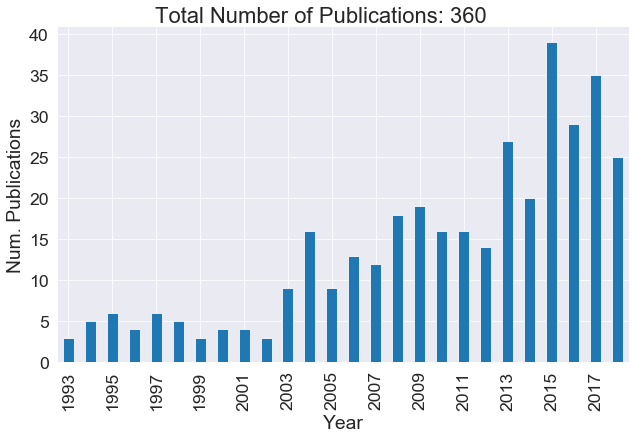

In [17]:
wos_plot.plot_pub_trend(wosis.extract_recs(integrated_frameworks.id, emf_rc))

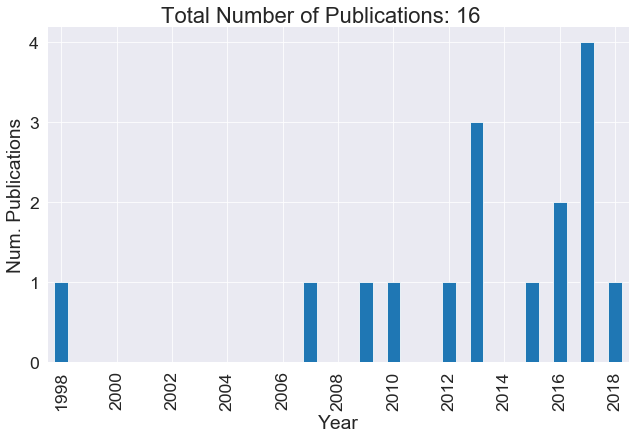

In [18]:
wos_plot.plot_pub_trend(wosis.extract_recs(web_platforms.id, emf_rc))

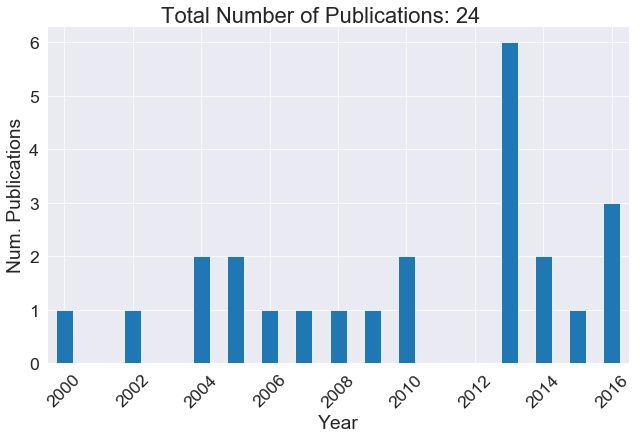

In [19]:
wos_plot.plot_pub_trend(wosis.extract_recs(component_based_development.id, emf_rc))

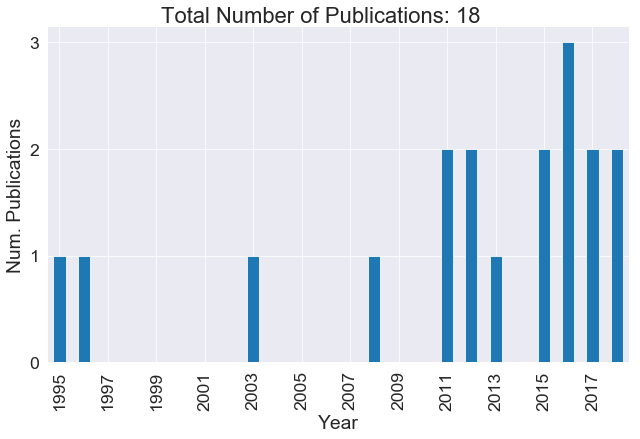

In [20]:
wos_plot.plot_pub_trend(wosis.extract_recs(scale_issues.id, emf_rc))

In [21]:
linked = wosis.link_to_pub(integrated_frameworks)
linked.loc[linked.year == min(linked.year)].title.tolist()

['STRUCTURAL MODELING AND SENSITIVITY ANALYSIS OF SHAPE OPTIMIZATION',
 'STOCHASTIC DYNAMIC-PROGRAMMING MODELS FOR WATER-QUALITY MANAGEMENT',
 'AN APPROXIMATION TECHNIQUE FOR STOCHASTIC ENVIRONMENTAL MODELING']

In [22]:
linked = wosis.link_to_pub(component_based_development)
linked.loc[linked.year == min(linked.year)].title.tolist()

['Component modeling for the spatial representation of wildlife movements']

In [23]:
linked = wosis.link_to_pub(scale_issues)
linked.loc[linked.year == min(linked.year)].title.tolist()

['SCALE ISSUES IN HYDROLOGICAL MODELING - A REVIEW']

In [24]:
frameworks = wosis.keyword_matches(emf_rc, ['software framework', 'model framework', 'model development'])

In [25]:
frameworks.summary

{"{'model development'}": 92,
 "{'model framework'}": 90,
 "{'software framework'}": 95}

These titles were then manually sorted based on percieved relevance. Here, we are interested in papers that speak of issues within the development process of Integrated Environmental Models and Frameworks.

An additional column ('relevant') was added with the following:

* Yes - Relevant
* No - Not relevant
* ? - Could not determine relevance with key phrases

The results were saved into a separate CSV file (loaded in below)

In [26]:
emf_manually_sorted = pd.read_csv('{}/emf_modelling_phrases_relevant.csv'.format(DATA_DIR))

In [27]:
# Create links to publications for review
relevant_pubs = emf_manually_sorted[emf_manually_sorted.relevant == 'Yes']
relevant_pubs_rc = wosis.find_pubs_by_doi(filtered_rc, relevant_pubs.DOI)
relevant_pubs_df = wosis.rc_to_df(relevant_pubs_rc)
relevant_pubs_df = wosis.link_to_pub(relevant_pubs_df)
relevant_pubs_df.loc[:, ['title', 'year', 'DOI link']].sort_values('year').reset_index(drop=True)

,title,year,DOI link
0,Delivering environmental decision support syst...,1997,https://dx.doi.org/10.1016/S1364-8152(97)00016-9
1,Issues of EIS software design: some lessons le...,2001,https://dx.doi.org/10.1016/S1364-8152(01)00011-1
2,A short discussion about the comparison betwee...,2006,https://dx.doi.org/10.1007/1-4020-5263-4_57
3,Environmental modelling for blue collars,2011,https://dx.doi.org/10.1504/IJEP.2011.045482
4,The dynamic simulation and visualization softw...,2011,https://dx.doi.org/10.1016/j.envsoft.2010.07.002
5,Behavioural issues in environmental modelling ...,2015,https://dx.doi.org/10.1016/j.envsoft.2015.08.019
6,Environmental Modelling with Reverse Combinato...,2017,https://dx.doi.org/10.1007/978-3-319-89935-0_34
7,Dilemmas of modelling and decision-making in e...,2018,https://dx.doi.org/10.1016/j.envsoft.2017.09.015


In [28]:
ems_software = iem_framework_subtopics.get_topic_by_id(6)

In [29]:
ems_software_rc = wosis.extract_recs(ems_software.id, filtered_rc)
len(ems_software_rc)

44

<hr>

In [30]:
iem_framework_subtopics

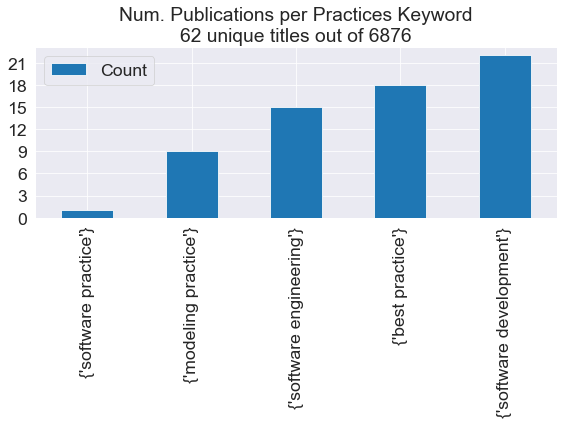

In [31]:
keywords = set(["software practice", "software development", "software engineering", 
                "best practice", "modeling practice"])

search_results = wosis.search_records(filtered_rc, keywords, threshold=95.0)

matches = wosis.keyword_matches(search_results, keywords, 95.0)

wos_plot.plot_pub_per_kw(matches.recs, matches.summary, filtered_rc, 'Practices', 
                         save_plot_fn='{}/pubs_per_practices_kw'.format(FIG_DIR))

In [32]:
keywords = set(["software practice", "software development", "github", "bitbucket", "gitlab"])

search_results = wosis.search_records(iem_assessment_rc, keywords, threshold=95.0)

matches = wosis.keyword_matches(search_results, keywords, 95.0)

# save_plot_fn='{}/pubs_per_practices_kw'.format(FIG_DIR)
wos_plot.plot_pub_per_kw(matches.recs, matches.summary, iem_assessment_rc, 'Version Control')

NameError: name 'iem_assessment_rc' is not defined

In [ ]:
software_phrases = wosis.find_phrases(software_in_iem)

In [ ]:
software_phrases.display_phrases()